In [64]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [65]:
pd.set_option('display.precision', 2)

In [66]:
df = pd.read_csv(filepath_or_buffer = '../../data/telecom_churn.csv')

In [67]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
State                     3333 non-null object
Account length            3333 non-null int64
Area code                 3333 non-null int64
International plan        3333 non-null object
Voice mail plan           3333 non-null object
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null int64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null int64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null int64
Total intl charge         3333 non-null float64
Customer service calls    3333 non-null int64


In [69]:
df.shape

(3333, 20)

In [70]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [71]:
df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

In [72]:
df[df['Churn'] == True].head()


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
10,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
15,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
21,CO,77,408,No,No,0,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5.7,6,1.54,5,True
33,AZ,12,408,No,No,0,249.6,118,42.43,252.4,119,21.45,280.2,90,12.61,11.8,3,3.19,1,True
41,MD,135,408,Yes,Yes,41,173.1,85,29.43,203.9,107,17.33,122.2,78,5.50,14.6,15,3.94,0,True


In [73]:
df.describe() #only numerical datatype (int and float)

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00
mean,101.06,437.18,8.10,179.78,100.44,30.56,200.98,100.11,17.08,200.87,100.11,9.04,10.24,4.48,2.76,1.56
std,39.82,42.37,13.69,54.47,20.07,9.26,50.71,19.92,4.31,50.57,19.57,2.28,2.79,2.46,0.75,1.32
min,1.00,408.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.20,33.00,1.04,0.00,0.00,0.00,0.00
25%,74.00,408.00,0.00,143.70,87.00,24.43,166.60,87.00,14.16,167.00,87.00,7.52,8.50,3.00,2.30,1.00
50%,101.00,415.00,0.00,179.40,101.00,30.50,201.40,100.00,17.12,201.20,100.00,9.05,10.30,4.00,2.78,1.00
75%,127.00,510.00,20.00,216.40,114.00,36.79,235.30,114.00,20.00,235.30,113.00,10.59,12.10,6.00,3.27,2.00
max,243.00,510.00,51.00,350.80,165.00,59.64,363.70,170.00,30.91,395.00,175.00,17.77,20.00,20.00,5.40,9.00


In [74]:
df['Churn'] = df['Churn'].astype('int64')

In [75]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00
mean,101.06,437.18,8.10,179.78,100.44,30.56,200.98,100.11,17.08,200.87,100.11,9.04,10.24,4.48,2.76,1.56,0.14
std,39.82,42.37,13.69,54.47,20.07,9.26,50.71,19.92,4.31,50.57,19.57,2.28,2.79,2.46,0.75,1.32,0.35
min,1.00,408.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.20,33.00,1.04,0.00,0.00,0.00,0.00,0.00
25%,74.00,408.00,0.00,143.70,87.00,24.43,166.60,87.00,14.16,167.00,87.00,7.52,8.50,3.00,2.30,1.00,0.00
50%,101.00,415.00,0.00,179.40,101.00,30.50,201.40,100.00,17.12,201.20,100.00,9.05,10.30,4.00,2.78,1.00,0.00
75%,127.00,510.00,20.00,216.40,114.00,36.79,235.30,114.00,20.00,235.30,113.00,10.59,12.10,6.00,3.27,2.00,0.00
max,243.00,510.00,51.00,350.80,165.00,59.64,363.70,170.00,30.91,395.00,175.00,17.77,20.00,20.00,5.40,9.00,1.00


In [76]:
# to see statistics of non-numerical datatypes include explicitly
df.describe(include=['bool','object'])

,State,International plan,Voice mail plan
count,3333,3333,3333
unique,51,2,2
top,WV,No,No
freq,106,3010,2411


In [77]:
df['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

## Sorting

In [78]:
# sorting wrt single column
df.sort_values(by='Total day charge', ascending=False).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
365,CO,154,415,No,No,0,350.8,75,59.64,216.5,94,18.40,253.9,100,11.43,10.1,9,2.73,1,1
985,NY,64,415,Yes,No,0,346.8,55,58.96,249.5,79,21.21,275.4,102,12.39,13.3,9,3.59,1,1
2594,OH,115,510,Yes,No,0,345.3,81,58.70,203.4,106,17.29,217.5,107,9.79,11.8,8,3.19,1,1
156,OH,83,415,No,No,0,337.4,120,57.36,227.4,116,19.33,153.9,114,6.93,15.8,7,4.27,0,1
605,MO,112,415,No,No,0,335.5,77,57.04,212.5,109,18.06,265.0,132,11.93,12.7,8,3.43,2,1


In [79]:
# sorting wrt multiple columns
df.sort_values(by=['Churn', 'Total day charge'],
              ascending=[True, False]).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
688,MN,13,510,No,Yes,21,315.6,105,53.65,208.9,71,17.76,260.1,123,11.70,12.1,3,3.27,3,0
2259,NC,210,415,No,Yes,31,313.8,87,53.35,147.7,103,12.55,192.7,97,8.67,10.1,7,2.73,3,0
534,LA,67,510,No,No,0,310.4,97,52.77,66.5,123,5.65,246.5,99,11.09,9.2,10,2.48,4,0
575,SD,114,415,No,Yes,36,309.9,90,52.68,200.3,89,17.03,183.5,105,8.26,14.2,2,3.83,1,0
2858,AL,141,510,No,Yes,28,308.0,123,52.36,247.8,128,21.06,152.9,103,6.88,7.4,3,2.00,1,0


## Indexing

In [80]:
df[df['Churn'] == 1].mean()

Account length            102.66
Area code                 437.82
Number vmail messages       5.12
Total day minutes         206.91
Total day calls           101.34
Total day charge           35.18
Total eve minutes         212.41
Total eve calls           100.56
Total eve charge           18.05
Total night minutes       205.23
Total night calls         100.40
Total night charge          9.24
Total intl minutes         10.70
Total intl calls            4.16
Total intl charge           2.89
Customer service calls      2.23
Churn                       1.00
dtype: float64

In [81]:
df[df['Churn'] == 0].mean()

Account length            100.79
Area code                 437.07
Number vmail messages       8.60
Total day minutes         175.18
Total day calls           100.28
Total day charge           29.78
Total eve minutes         199.04
Total eve calls           100.04
Total eve charge           16.92
Total night minutes       200.13
Total night calls         100.06
Total night charge          9.01
Total intl minutes         10.16
Total intl calls            4.53
Total intl charge           2.74
Customer service calls      1.45
Churn                       0.00
dtype: float64

#### What is the maximum length of international calls among loyal users (Churn == 0) who do not have an international plan?


In [82]:
df[(df['Churn'] == 0) & (df['International plan'] == 'No')]['Total intl minutes'].max()

18.9

#### How much time (on average) do churned users spend on the phone during daytime?



In [83]:
df[df['Churn']==1]['Total day minutes'].mean()

206.91407867494814

In [84]:
df[df['Churn']==0]['Total day minutes'].mean()

175.17575438596492

#### What is the maximum length of international calls among loyal users (Churn == 0) who do not have an international plan?




In [85]:
df['International plan'].unique()

array(['No', 'Yes'], dtype=object)

In [86]:
df['Churn'].unique()

array([0, 1])

In [87]:
df[(df['Churn']==0) & (df['International plan']=='No')]['Total intl minutes'].max()

18.9

####  "give us the values of the rows with index from 0 to 5 (inclusive) and columns labeled from State to Area code (inclusive)"

In [88]:
df.loc[0:5, 'State':'Area code'] # indexing by name

,State,Account length,Area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415
5,AL,118,510


In [89]:
df.iloc[0:5, 0:3] # indexing by number

,State,Account length,Area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415


#### special indexing for first and last line

In [90]:
df[:1] # first line

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,0


In [91]:
df[-1:] # last line

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.6,241.4,77,10.86,13.7,4,3.7,0,0


## Apply function

#### get max of each column

In [92]:
df.apply(np.max)

State                          WY
Account length                243
Area code                     510
International plan            Yes
Voice mail plan               Yes
Number vmail messages          51
Total day minutes         3.5e+02
Total day calls               165
Total day charge               60
Total eve minutes         3.6e+02
Total eve calls               170
Total eve charge               31
Total night minutes         4e+02
Total night calls             175
Total night charge             18
Total intl minutes             20
Total intl calls               20
Total intl charge             5.4
Customer service calls          9
Churn                           1
dtype: object

#### get all rows with state name starting with W

In [93]:
df[df['State'].apply(lambda state: state[0] == 'W')].head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0
26,WY,57,408,No,Yes,39,213.0,115,36.21,191.1,112,16.24,182.7,115,8.22,9.5,3,2.57,0,0
44,WI,64,510,No,No,0,154.0,67,26.18,225.8,118,19.19,265.3,86,11.94,3.5,3,0.95,1,0
49,WY,97,415,No,Yes,24,133.2,135,22.64,217.2,58,18.46,70.6,79,3.18,11.0,3,2.97,1,0
54,WY,87,415,No,No,0,151.0,83,25.67,219.7,116,18.67,203.9,127,9.18,9.7,3,2.62,5,1


#### The map method can be used to replace values in a column by passing a dictionary of the form {old_value: new_value} as its argument:



In [94]:
d = {'Yes':True, 'No':False}
df['International plan'] = df['International plan'].map(d)
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,False,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,False,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,True,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [95]:
df['International plan'].unique()

array([False,  True])

In [96]:
df = df.replace({'Voice mail plan' : d})
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


## Grouping

In [97]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [102]:
df.groupby(by=['State'])['Total day calls', 'Total night calls'].describe()

Total day calls                                                    \
                count    mean    std   min    25%    50%     75%    max   
State                                                                     
AK               52.0   95.27  19.13  55.0  84.75   96.0  106.25  129.0   
AL               80.0   99.10  17.38  62.0  86.75   96.5  112.00  139.0   
AR               55.0  102.15  20.81  56.0  88.50  102.0  114.50  145.0   
AZ               64.0  100.11  22.02  52.0  86.50   98.5  115.25  163.0   
CA               34.0  104.50  22.86  42.0  90.50  109.5  121.50  150.0   
CO               66.0   95.12  19.48  53.0  84.00   97.5  106.75  145.0   
CT               74.0   98.43  20.07  49.0  87.25   99.5  111.00  137.0   
DC               54.0  100.17  20.36  61.0  86.25  101.5  110.00  147.0   
DE               61.0   98.64  20.81  42.0  85.00  100.0  110.00  140.0   
FL               63.0  101.00  16.07  63.0  89.00   98.0  112.50  143.0   
GA               54.0  103.06  18.56  61.0  90.00  105.0  115.50  137.0   
HI               53.0  102.81  19.04  44.0  94.00  104.0  117.00  147.0   
IA               44.0  103.05  20.15  67.0  86.75  101.0  115.00  141.0   
ID               73.0  106.22  18.76  65.0  93.00  106.0  117.00  151.0   
IL               58.0  101.69  18.38  65.0  91.00  101.5  113.75  141.0   
IN               71.0  107.06  19.03  57.0  94.00  107.0  122.50  157.0   
KS               70.0  101.03  17.26  68.0  87.25  103.5  112.75  144.0   
KY               59.0  100.34  18.14  62.0  84.00   99.0  114.00  147.0   
LA               51.0  103.51  17.25  67.0  92.50  101.0  120.00  140.0   
MA               65.0  102.29  21.41  49.0  88.00  100.0  116.00  158.0   
MD               70.0   99.36  19.42  56.0  86.50   98.0  115.75  145.0   
ME               62.0   99.50  19.18  56.0  89.50  102.0  112.00  140.0   
MI               73.0  101.21  20.25  53.0  88.00  102.0  113.00  165.0   
MN               84.0   99.12  22.27  54.0  84.00   99.0  112.00  147.0   
MO               63.0   99.94  19.27  51.0  85.00  101.0  111.50  145.0   
MS               65.0  100.71  19.61  48.0  90.00  104.0  112.00  156.0   
MT               68.0   95.22  22.46  35.0  82.00   96.5  110.25  160.0   
NC               68.0  102.79  20.95  55.0  88.75  104.0  115.00  151.0   
ND               62.0  100.15  18.31  54.0  88.00   99.0  110.50  144.0   
NE               61.0   97.41  19.95  36.0  86.00   98.0  110.00  146.0   
NH               56.0   98.96  21.48  30.0  87.75   98.5  113.25  148.0   
NJ               68.0  100.10  20.59  55.0  85.75  102.0  115.25  145.0   
NM               62.0  102.24  19.79  57.0  87.25  101.5  114.75  148.0   
NV               66.0  101.42  20.47  54.0  90.25  101.0  114.00  150.0   
NY               83.0   98.24  19.05  55.0  82.00  101.0  112.50  134.0   
OH               78.0   99.63  19.68  54.0  88.00   99.5  111.75  150.0   
OK               61.0  100.26  21.51  52.0  85.00  103.0  116.00  151.0   
OR               78.0   95.73  20.04  44.0  82.25   97.5  107.75  143.0   
PA               45.0   98.64  22.72  45.0  78.00  101.0  114.00  151.0   
RI               65.0  100.43  20.21  51.0  88.00  104.0  112.00  134.0   
SC               60.0  102.47  20.51  45.0  92.00  102.0  117.00  149.0   
SD               60.0   94.82  21.91   0.0  81.00   95.5  110.00  135.0   
TN               53.0  101.45  23.13  57.0  84.00   99.0  119.00  145.0   
TX               72.0   99.99  15.41  51.0  90.75  102.0  110.00  143.0   
UT               72.0   98.96  19.57  40.0  86.75  101.0  111.00  150.0   
VA               77.0  105.36  19.03  63.0  93.00  107.0  120.00  142.0   
VT               73.0  100.33  22.71   0.0  89.00  103.0  116.00  136.0   
WA               66.0  101.20  17.67  65.0  91.25  102.5  114.75  146.0   
WI               78.0   96.68  19.53  54.0  86.25   96.0  108.00  141.0   
WV              106.0  103.78  21.93  40.0  90.25  104.0  120.75  158.0   
WY               77.0  102.22  

## agg function

In [103]:
df.groupby(by=['Churn'])['International plan','Total day minutes'].agg([np.max, np.min, np.sum, np.std])

International plan                     Total day minutes                 \
                    amax   amin    sum   std              amax amin       sum   
Churn                                                                           
0                   True  False  186.0  0.25             315.6  0.0  499250.9   
1                   True  False  137.0  0.45             350.8  0.0   99939.5   

              
         std  
Churn         
0      50.18  
1      69.00

## crosstab

In [104]:
pd.crosstab(df['Churn'], df['International plan'])

International plan,False,True
Churn,,
0,2664,186
1,346,137


In [107]:
pd.crosstab(df['Churn'], df['State'])

State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
Churn,,,,,,,,,,,,,,,,,,,,,
0,49,72,44,60,25,57,62,49,52,55,...,52,48,54,62,72,65,52,71,96,68
1,3,8,11,4,9,9,12,5,9,8,...,8,5,18,10,5,8,14,7,10,9


## Pivot Table

#### the average number of day, evening, and night calls by area code

In [108]:
df.pivot_table(['Total day calls', 'Total eve calls', 'Total night calls'],
               ['Area code'], 
               aggfunc='mean')

,Total day calls,Total eve calls,Total night calls
Area code,,,
408,100.50,99.79,99.04
415,100.58,100.50,100.40
510,100.10,99.67,100.60


In [110]:
df.groupby(by='Area code')['Total day calls', 'Total eve calls', 'Total night calls'].mean()

,Total day calls,Total eve calls,Total night calls
Area code,,,
408,100.50,99.79,99.04
415,100.58,100.50,100.40
510,100.10,99.67,100.60


## dataframe transformation

In [112]:
# indirect
total_calls = df['Total day calls'] + df['Total eve calls'] + \
              df['Total night calls'] + df['Total intl calls']
df.insert(loc=len(df.columns), column='Total calls', value=total_calls)
df.head()

ValueError: cannot insert Total calls, already exists

In [113]:
df['Total charge'] = df['Total day charge']  + df['Total eve charge'] + \
                     df['Total night charge'] + df['Total intl charge']
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total calls,Total charge
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,...,244.7,91,11.01,10.0,3,2.70,1,0,303,75.56
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,...,254.4,103,11.45,13.7,3,3.70,1,0,332,59.24
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,...,162.6,104,7.32,12.2,5,3.29,0,0,333,62.29
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,...,196.9,89,8.86,6.6,7,1.78,2,0,255,66.80
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,...,186.9,121,8.41,10.1,3,2.73,3,0,359,52.09


### drop columns

In [114]:
df.drop(['Total charge','Total calls'], axis=1, inplace=True) # axis is 1 for columns, inplace 

In [115]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [116]:
df.drop([1, 2]).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,AL,118,510,True,False,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
6,MA,121,510,False,True,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


## Predicting Telecom Churn

### Looking at different features with respect to the Class using Crosstab

In [118]:
pd.crosstab(df['Churn'], df['International plan'])

International plan,False,True
Churn,,
0,2664,186
1,346,137


In [119]:
# some imports to set up plotting 
import matplotlib.pyplot as plt
# pip install seaborn 
import seaborn as sns
# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'


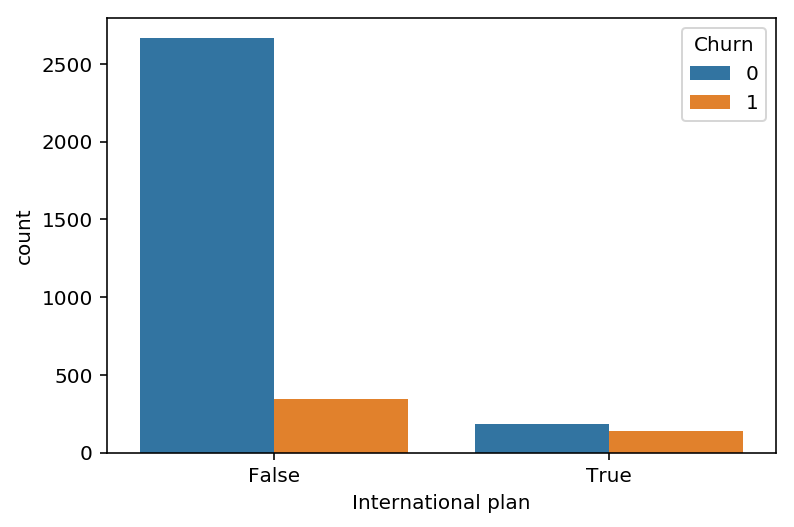

In [120]:
sns.countplot(x='International plan', hue='Churn', data=df)

In [122]:
pd.crosstab(df['Churn'], df['Customer service calls'], margins=True) # also shows the sums for each row and col

Customer service calls,0,1,2,3,4,5,6,7,8,9,All
Churn,,,,,,,,,,,
0,605,1059,672,385,90,26,8,4,1,0,2850
1,92,122,87,44,76,40,14,5,1,2,483
All,697,1181,759,429,166,66,22,9,2,2,3333


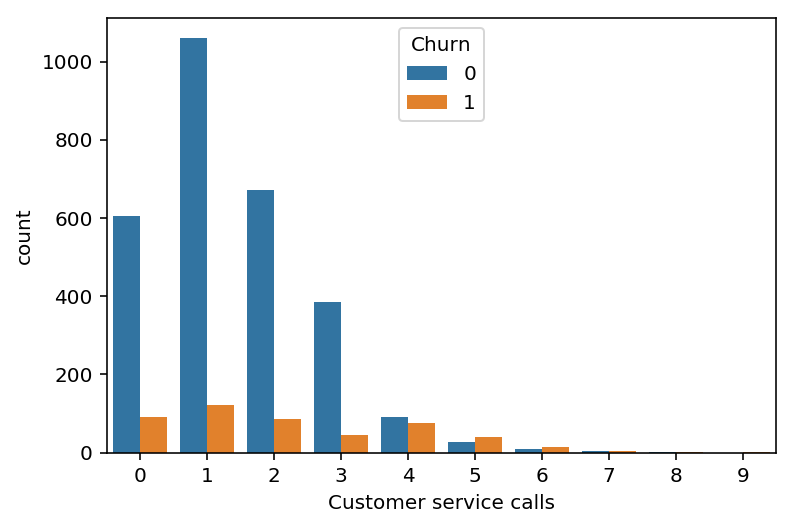

In [125]:
sns.countplot(x='Customer service calls', hue='Churn',data=df)

In [126]:
df['Many service calls'] = (df['Customer service calls'] > 3).astype('int')


In [127]:
pd.crosstab(df['Churn'], df['Many service calls'], margins=True)

Many service calls,0,1,All
Churn,,,
0,2721,129,2850
1,345,138,483
All,3066,267,3333
